### Decision Tree Fraud Check

In [1]:
## Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Reading the Dataset
fr_data = pd.read_csv('Fraud_check.csv')
fr_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fr_data.columns = ['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation', 'WorkExperience', 'Urban']
fr_data.tail()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
fr_data.describe()

,TaxableIncome,CityPopulation,WorkExperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
Status = pd.cut(fr_data['TaxableIncome'], bins=(-1003, 30000, 99620), labels=('Risky', 'Good'))
Status.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: TaxableIncome, dtype: category
Categories (2, object): [Risky < Good]

In [9]:
fr_data['Status'] = Status
fr_data.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [10]:
fr_data.drop(columns='TaxableIncome', inplace=True)
fr_data.head()

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


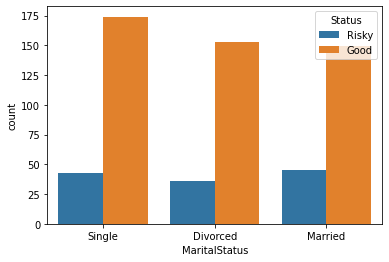

In [11]:
sns.countplot(x = 'MaritalStatus', hue='Status', data=fr_data)

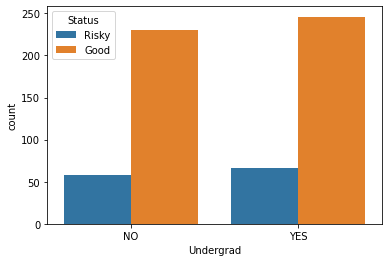

In [12]:
sns.countplot(x = 'Undergrad', hue='Status', data=fr_data)

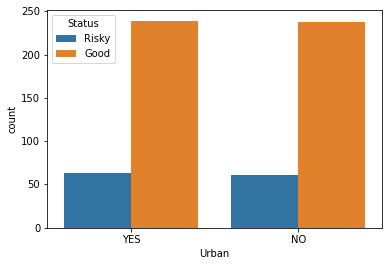

In [13]:
sns.countplot(x = 'Urban', hue='Status', data=fr_data)

In [14]:
X = fr_data.iloc[:, 0:5]
Y = fr_data['Status']
X.head()

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [15]:
Y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Status, dtype: category
Categories (2, object): [Risky < Good]

In [16]:
X = pd.get_dummies(X)
X.head()

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [17]:
### Normalizing data
from sklearn.preprocessing import MinMaxScaler

In [18]:
norm = MinMaxScaler()

In [19]:
cols = X.columns
cols

Index(['CityPopulation', 'WorkExperience', 'Undergrad_NO', 'Undergrad_YES',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [20]:
X = norm.fit_transform(X)

In [21]:
X = pd.DataFrame(X, columns=cols)
X.head()

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [22]:
## Splitting Data into train and test
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.31, random_state = 1 )
X_train.head()

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
157,0.516394,0.166667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16,0.050414,0.966667,0.0,1.0,1.0,0.0,0.0,1.0,0.0
574,0.017178,0.966667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
236,0.962155,0.100000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
394,0.225352,0.700000,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
X_test.shape

(186, 9)

In [25]:
X_train.shape

(414, 9)

In [26]:
y_test.head()

446    Risky
404     Good
509    Risky
455     Good
201     Good
Name: Status, dtype: category
Categories (2, object): [Risky < Good]

#### Building Model using CART

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [87]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=2)

In [88]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [89]:
pred_train = model.predict(X_train)

In [90]:
pred_test = model.predict(X_test)

In [94]:
### Training data accuracy
acc_trn = accuracy_score(pred_train, y_train)*100
acc_trn

80.67632850241546

In [93]:
## Test Data Accuracy
acc_tst = accuracy_score(pred_test, y_test)*100
acc_tst

77.95698924731182

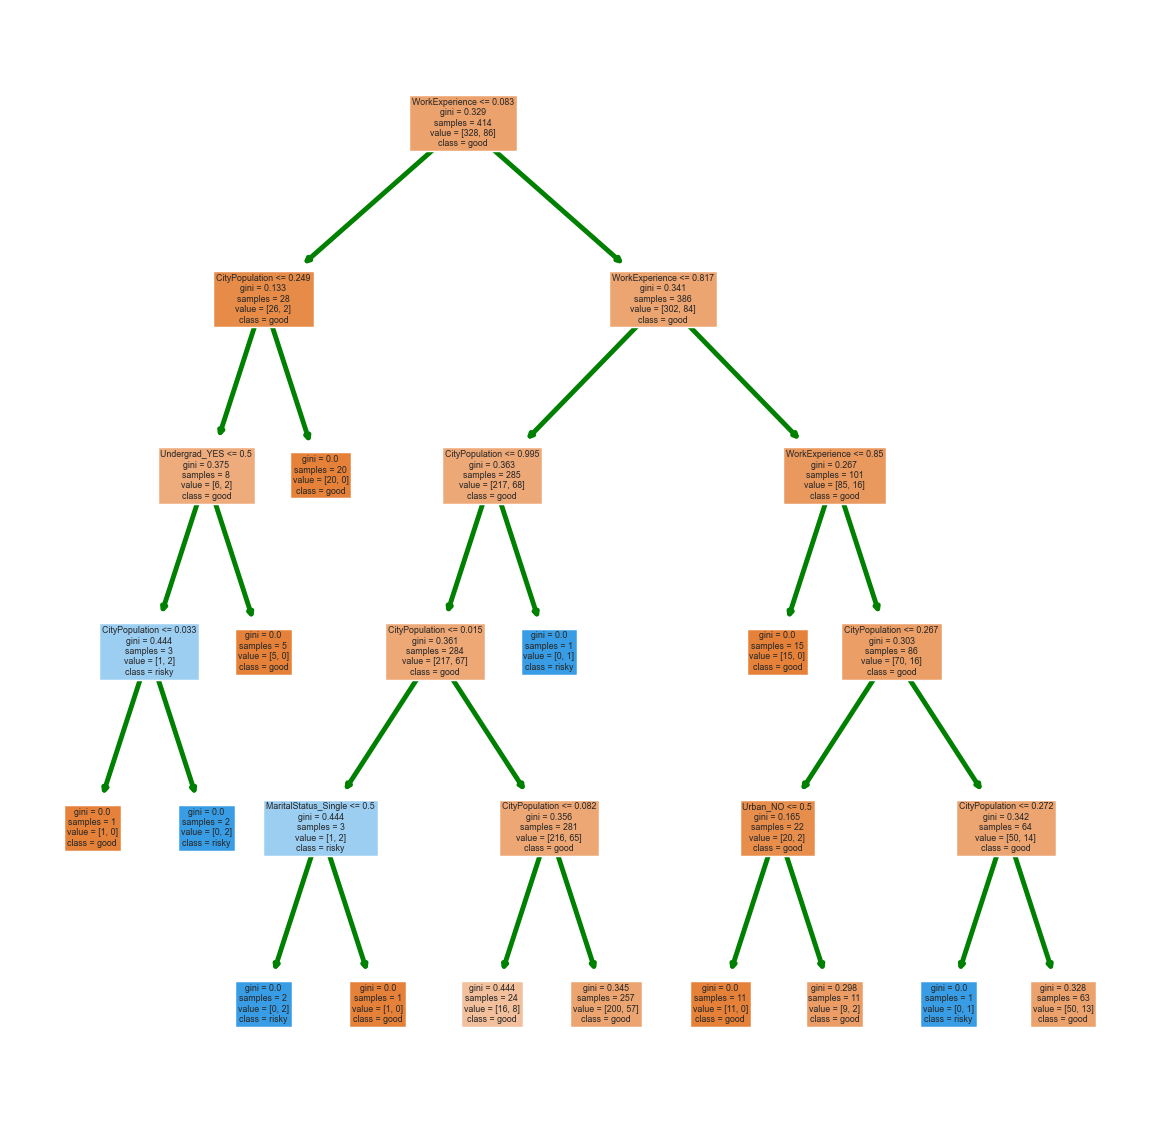

In [96]:
### Visualizing the tree
plt.style.use('seaborn')
fn = cols
cn = ['good', 'risky']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi = 350)
tree_plot = tree.plot_tree(model, feature_names=fn,
              class_names=cn,
              filled=True)
for o in tree_plot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('green')
        arrow.set_linewidth(1)

In [97]:
## Pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00087835, 0.00131934, 0.00214123, 0.00276624,
       0.00291674])

In [98]:
acc_train, acc_test = [], []

for i in alphas:
    model = DecisionTreeClassifier(ccp_alpha=i)
    model.fit(X_train, y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    acc_train.append(accuracy_score(y_train, Y_train_pred))
    acc_test.append(accuracy_score(y_test, Y_test_pred))

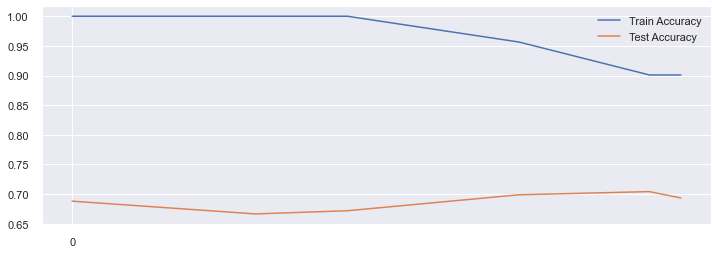

In [99]:
sns.set()
plt.figure(figsize=(12,4))
sns.lineplot(y=acc_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=acc_test, x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.10, 1))
plt.show()

#### Building model with C5.0 Classifier

In [106]:
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

In [107]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

In [108]:
y_pred_train = model_2.predict(X_train)
y_pred_train

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [109]:
y_pred_test = model_2.predict(X_test)
y_pred_test

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [110]:
train_acc = accuracy_score(y_pred_train, y_train)*100
train_acc

80.67632850241546

In [111]:
test_acc = accuracy_score(y_pred_test, y_test)*100
test_acc

77.41935483870968